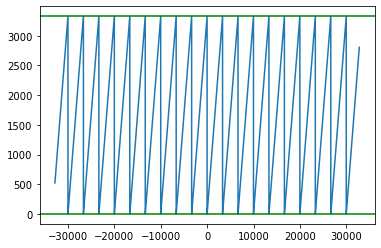

In [1]:
import matplotlib.pyplot as plt
import math

def barrett_ppqe(pp,q,e):
    return (pp//q)+e

def barrett_fun_aux (a,pp,ppqe):
    return (a * ppqe) // pp

def barrett_fun (a,pp,q,e):
    return a - barrett_fun_aux(a,pp,barrett_ppqe(pp,q,e)) * q

def chart_barrett_fun (amin,amax,pp,q,e):
    x = [a for a in range(amin,amax)]
    y = [barrett_fun(a,pp,q,e) for a in x]
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.axhline(0,color='g')
    plt.axhline(q,color='g')
    plt.show()

k=8
kk=26
p=2**k
pp=2**kk
eta=13
q=p*eta+1
arange=2**15
e=1

chart_barrett_fun(-arange,arange,pp,q,e)

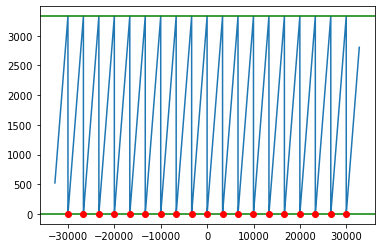

In [2]:
def barrett_argmin (k,pp,q,e):
    return math.ceil((pp*k)/barrett_ppqe(pp,q,e))

def barrett_argmin_minlabel (amin,pp,q,e):
    return (((barrett_ppqe(pp,q,e)*(amin-1)) // pp) + 1)

def barrett_argmin_maxlabel (amax,pp,q,e):
    return barrett_argmin_minlabel (amax,pp,q,e)

def chart_barrett_fun_and_min (amin,amax,pp,q,e):
    x = [a for a in range(amin,amax)]
    y = [barrett_fun(a,pp,q,e) for a in x]
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.axhline(0,color='g')
    plt.axhline(q,color='g')
    argminlabels = [k for k in range(barrett_argmin_minlabel(amin,pp,q,e),barrett_argmin_maxlabel(amax,pp,q,e))]
    argmins = [barrett_argmin(k,pp,q,e) for k in argminlabels]
    mins = [barrett_fun(a,pp,q,e) for a in argmins]
    ax.plot(argmins,mins,'o',color='red')
    plt.show()

chart_barrett_fun_and_min(-arange,arange,pp,q,e)

In [3]:
def print_mins (amin,amax,pp,q,e):
    argminlabels = [k for k in range(barrett_argmin_minlabel(amin,pp,q,e),barrett_argmin_maxlabel(amax,pp,q,e))]
    argmins = [barrett_argmin(k,pp,q,e) for k in argminlabels]
    mins = [barrett_fun(a,pp,q,e) for a in argmins]
    print(argmins)
    print(mins)

print_mins(-arange,arange,pp,q,e)

[-29960, -26631, -23302, -19973, -16644, -13315, -9986, -6657, -3328, 0, 3329, 6658, 9987, 13316, 16645, 19974, 23303, 26632, 29961]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


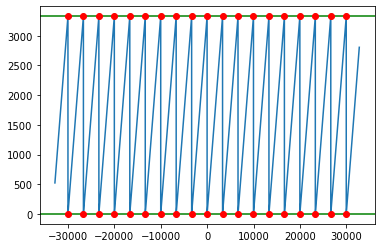

In [4]:
def barrett_argmax (k,pp,q,e):
    return barrett_argmin (k+1,pp,q,e) - 1

def barrett_argmax_minlabel (amin,pp,q,e):
    return ((barrett_ppqe(pp,q,e)*amin) // pp)

def barrett_argmax_maxlabel (amax,pp,q,e):
    return barrett_argmax_minlabel (amax,pp,q,e)

def chart_barrett_fun_and_minmax (amin,amax,pp,q,e):
    x = [a for a in range(amin,amax)]
    y = [barrett_fun(a,pp,q,e) for a in x]
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.axhline(0,color='g')
    plt.axhline(q,color='g')
    argminlabels = [k for k in range(barrett_argmin_minlabel(amin,pp,q,e),barrett_argmin_maxlabel(amax,pp,q,e))]
    argmins = [barrett_argmin(k,pp,q,e) for k in argminlabels]
    mins = [barrett_fun(a,pp,q,e) for a in argmins]
    ax.plot(argmins,mins,'o',color='red')
    argmaxlabels = [k for k in range(barrett_argmax_minlabel(amin,pp,q,e),barrett_argmax_maxlabel(amax,pp,q,e))]
    argmaxs = [barrett_argmax(k,pp,q,e) for k in argmaxlabels]
    maxs = [barrett_fun(a,pp,q,e) for a in argmaxs]
    ax.plot(argmaxs,maxs,'o',color='red')
    plt.show()

chart_barrett_fun_and_minmax(-arange,arange,pp,q,e)

In [5]:
def print_maxs (amin,amax,pp,q,e):
    argmaxlabels = [k for k in range(barrett_argmax_minlabel(amin,pp,q,e),barrett_argmax_maxlabel(amax,pp,q,e))]
    argmaxs = [barrett_argmax(k,pp,q,e) for k in argmaxlabels]
    maxs = [barrett_fun(a,pp,q,e) for a in argmaxs]
    print(argmaxs)
    print([(m - q) for m in maxs])

print_maxs(-arange,arange,pp,q,e)

[-29961, -26632, -23303, -19974, -16645, -13316, -9987, -6658, -3329, -1, 3328, 6657, 9986, 13315, 16644, 19973, 23302, 26631, 29960]
[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [7]:
print(pp)
print(q)
print(barrett_ppqe(pp,q,e))
print(arange)

67108864
3329
20159
32768
